In [ ]:
import os

# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 


os.environ['HF_HOME'] =os.getenv("CACHE_LOCATION")
!export HF_HOME=os.getenv("CACHE_LOCATION")
%pip install huggingface_hub --upgrade
%pip install diffusers accelerate transformers safetensors sentencepiece
%pip install beautifulsoup4
%pip install python-dotenv


%pip show ipywidgets
%pip install --upgrade ipywidgets
%pip install protobuf
%pip install sentencepiece




!huggingface-cli login --token {os.getenv("HUGGINGFACE_TOKEN")} --add-to-git-credential



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Name: ipywidgets
Version: 8.1.5
Summary: Jupyter interactive widgets
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD 3-Clause License
Location: /home/malneyugnfl/anaconda3/envs/huggingface/lib/python3.10/site-packages
Requires: comm, ipython, jupyterlab-widgets, traitlets, widgetsnbextension
Required-by: 
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%jupyter` not found.


# Load Models into GPU

In [2]:
from diffusers import DiffusionPipeline
from diffusers.utils import pt_to_pil
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mediapy as media
from PIL import Image

# stage 1
stage_1 = DiffusionPipeline.from_pretrained("DeepFloyd/IF-I-XL-v1.0", variant="fp16", torch_dtype=torch.float16, device_map="balanced")

# stage 2
stage_2 = DiffusionPipeline.from_pretrained(
    "DeepFloyd/IF-II-L-v1.0", text_encoder=None, variant="fp16", torch_dtype=torch.float16, device_map="balanced"
)

# stage 3
stage_3 = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-x4-upscaler", torch_dtype=torch.float16, device_map="balanced")


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00001-of-00002.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, safety_checker/model.fp16.safetensors, text_encoder/model.fp16-00002-of-00002.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565

A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[text_encoder/model.fp16-00001-of-00002.safetensors, unet/diffusion_pytorch_model.fp16.safetensors, safety_checker/model.fp16.safetensors, text_encoder/model.fp16-00002-of-00002.safetensors]
Loaded non-fp16 filenames:
[watermarker/diffusion_pytorch_model.safetensors
If this behavior is not expected, please check your folder structure.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Taking `'Attention' object has no attribute 'key'` while using `accelerate.load_checkpoint_and_dispatch` to mean /mnt/Creative/SoftwareDevelopment/huggingface/cache/hub/models--stabilityai--stable-diffusion-x4-upscaler/snapshots/572c99286543a273bfd17fac263db5a77be12c4c/vae was saved with deprecated attention block weight names. We will load it with the deprecated attention block names and convert them on the fly to the new attention block format. Please re-save the model after this conversion, so we don't have to do the on the fly renaming in the future. If the model is from a hub checkpoint, please also re-upload it or open a PR on the original repository.


# Retrieve Text Embeddings

In [17]:
prompt = "Cat under the moon sitting on a fence"

# text embeds
prompt_embeds, negative_embeds = stage_1.encode_prompt(prompt)


# Generate Image

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/home/malneyugnfl/anaconda3/envs/huggingface/lib/python3.10/site-packages/diffusers/image_processor.py:724: FutureWarning: Passing `image` as torch tensor with value range in [-1,1] is deprecated. The expected value range for image tensor is [0,1] when passing as pytorch tensor or numpy Array. You passed `image` with value range [-1.0,1.0]
  warnings.warn(


  0%|          | 0/75 [00:00<?, ?it/s]

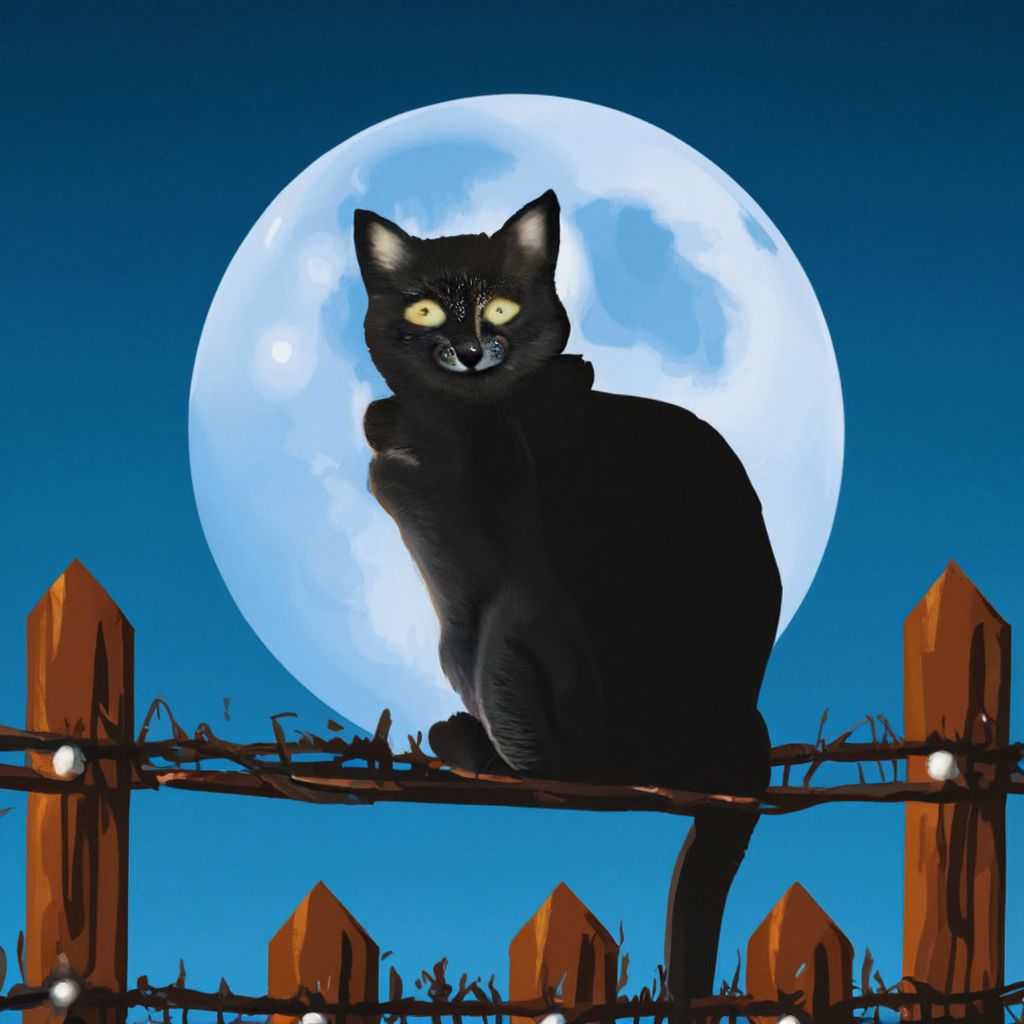

In [ ]:
import random

# Run Stage 1
generator = torch.manual_seed(random.randint(0, 1000000))

image1 = stage_1(prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_embeds, generator=generator, output_type="pt").images

# Run Stage 2

image2 = stage_2(
    image=image1, prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_embeds, generator=generator, output_type="pt"
).images

# Run Stage 3

image3 = stage_3(prompt=prompt, image=image2, generator=generator, noise_level=100).images


# Sho





















                                                    21e 12 we231`   w2  qweas `
display(image3[0])
image3[0].save("./if_stage_III.png")
